# House price prediction model

## Using multiple linear regression
### I have learned these methods in Machine learning with Python in Coursera by IBM
<hr>

#### Importing packages

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model

### Reading and understanding data

In [29]:
df = pd.read_csv("train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Choosing what data to use:
* LotArea
* OverallQual - Quality influences price.
* GrLivArea - Green part impacts the price.
* GarageCars - Number of garage inlfluence the price
* TotalBsmtSF - Basement has significant effect
* FullBath - Bath has significant effect
* YearBuilt
* Neighborhood
* CentralAir
* SalePrice - our y

Transforming non-continuous data to continiuos

In [33]:
df['CentralAir'] = df['CentralAir'].replace({'Y': 1, 'N': 0})
mean_encoded_neighborhood = df.groupby('Neighborhood')['SalePrice'].mean().to_dict()
df['Neighborhood'] = df['Neighborhood'].map(mean_encoded_neighborhood)

In [36]:
cdf = df[['LotArea','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath', 'YearBuilt', 'Neighborhood', 'CentralAir', 'SalePrice']]
cdf.head(10)

,LotArea,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Neighborhood,CentralAir,SalePrice
0,8450,7,1710,2,856,2,2003,197965.773333,1,208500
1,9600,6,1262,2,1262,2,1976,238772.727273,1,181500
2,11250,7,1786,2,920,2,2001,197965.773333,1,223500
3,9550,7,1717,3,756,1,1915,210624.725490,1,140000
4,14260,8,2198,3,1145,2,2000,335295.317073,1,250000
5,14115,5,1362,2,796,1,1993,156270.122449,1,143000
6,10084,8,1694,2,1686,2,2004,225379.837209,1,307000
7,10382,7,2090,2,1107,2,1973,189050.068493,1,200000
8,6120,7,1774,2,952,2,1931,128225.300885,1,129900
9,7420,5,1077,1,991,1,1939,124834.051724,1,118000


### Let's plot SalePrice with respect to LotArea

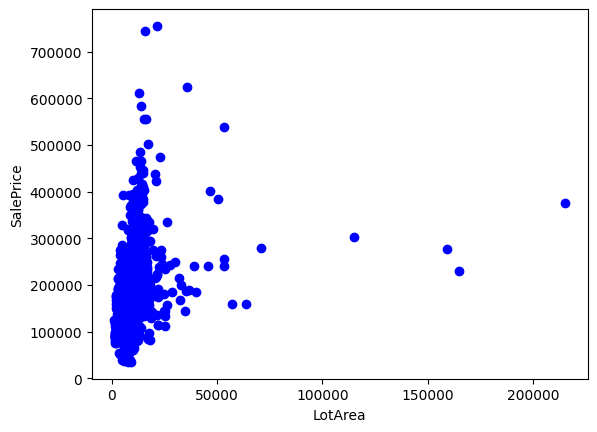

In [38]:
plt.scatter(cdf.LotArea, cdf.SalePrice,  color='blue')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

### Creating train and test data to evaluate the model

In [39]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Train data distribution

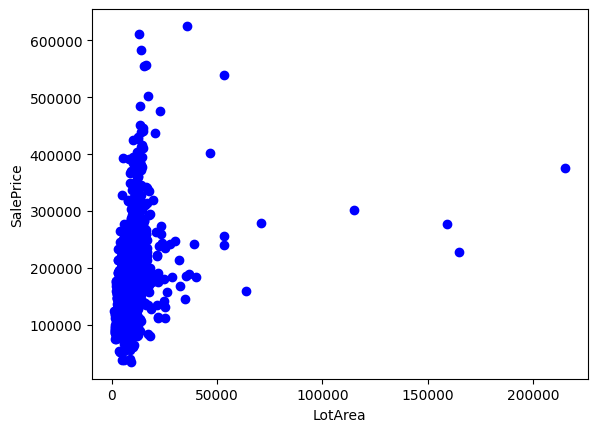

In [40]:
plt.scatter(train.LotArea, train.SalePrice,  color='blue')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

## Training Multiple linear regression model

In [41]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['LotArea','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath', 'YearBuilt', 'Neighborhood', 'CentralAir']])
y = np.asanyarray(train[['SalePrice']])
regr.fit(x,y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 5.27261043e-01  1.64571876e+04  4.16252528e+01  1.13069430e+04
   2.08746221e+01 -3.17595852e+03  6.73120346e+01  3.68569369e-01
   8.39884845e+03]]


In [42]:
y_hat = regr.predict(test[['LotArea','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath', 'YearBuilt', 'Neighborhood', 'CentralAir']])
x = np.asanyarray(test[['LotArea','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath', 'YearBuilt', 'Neighborhood', 'CentralAir']])
y = np.asanyarray(test[['SalePrice']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 1203053201.21
Variance score: 0.83


c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [60]:
test_df = pd.read_csv("test.csv")
test_cdf = test_df[['LotArea','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath', 'YearBuilt', 'Neighborhood', 'CentralAir']]
test_cdf['CentralAir'] = test_cdf['CentralAir'].replace({'Y': 1, 'N': 0})
test_cdf['Neighborhood'] = test_cdf['Neighborhood'].map(mean_encoded_neighborhood)
test_cdf = test_cdf.fillna(test_cdf.median())
test_cdf.head(10)

C:\Users\ptren\AppData\Local\Temp\ipykernel_17464\760090653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cdf['CentralAir'] = test_cdf['CentralAir'].replace({'Y': 1, 'N': 0})
C:\Users\ptren\AppData\Local\Temp\ipykernel_17464\760090653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cdf['Neighborhood'] = test_cdf['Neighborhood'].map(mean_encoded_neighborhood)


,LotArea,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Neighborhood,CentralAir
0,11622,5,896,1.0,882.0,1,1961,145847.080000,1
1,14267,6,1329,1.0,1329.0,1,1958,145847.080000,1
2,13830,5,1629,2.0,928.0,2,1997,192854.506329,1
3,9978,6,1604,2.0,926.0,2,1998,192854.506329,1
4,5005,8,1280,2.0,1280.0,2,1992,310499.000000,1
5,10000,6,1655,2.0,763.0,2,1993,192854.506329,1
6,7980,6,1187,2.0,1168.0,2,1992,192854.506329,1
7,8402,6,1465,2.0,789.0,2,1998,192854.506329,1
8,10176,7,1341,2.0,1300.0,1,1990,192854.506329,1
9,8400,4,882,2.0,882.0,1,1970,145847.080000,1


### Make prediction and save to another file

In [63]:
X_train = test_cdf
predictions = regr.predict(X_train)
predictions = predictions.flatten()
output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})
output.to_csv('predictions.csv', index=False)

# Or directly work with the predictions in your application
print(predictions)

[113522.58201065 158527.12952284 174038.0325213  ... 153813.42388445
 111227.73831148 219152.58426706]


c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
